In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv('./data/Heart Classification Task - Data.csv')
df.head()
df.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(303, 14)

# Baseline model

In [3]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
train, test = train_test_split(df, test_size=0.1, random_state=100)

## validation

#### Cross-validation

In [8]:
model = XGBClassifier()
_ = model.fit(train.drop('target', axis=1), train['target'])
scores = cross_val_score(model, df.drop('target', axis=1), df['target'], cv=5)

print(scores)
print(f"score: {scores.mean()} +-({scores.std():.2f})")

[0.83606557 0.85245902 0.81967213 0.8        0.76666667]
score: 0.8149726775956283 +-(0.03)


#### train-test-split

In [9]:
_ = model.fit(train.drop('target', axis=1), train['target'])
model.score(test.drop('target', axis=1), test['target'])

0.8064516129032258

| model | cross-validation-score (k=5) | score |
|-------|--------|--------|
|LogisticRegression | 0.824 | **0.870** |
|XGBClassifier| 0.814 | 0.806 |
|KNeighborsClassifier| 0.643 | 0.580 |
|SVC (rbf) | 0.643| 0.548 |
|SVC (linear) | **0.828**| 0.806 |
|SVC (poly d=3) | 0.653| 0.677 |
|SVC (poly d=4) | 0.663| 0.645 |
|SVC (poly d=5) | 0.663| 0.677 |
|DecisionTreeClassifier | 0.752| 0.774 | 
|RandomForestClassifier | 0.821| 0.838 | 
|GradientBoostingClassifier | 0.808 | 0.806 |

In [10]:
importance_feature = pd.concat(
    [
        pd.Series(train.drop('target', axis=1).columns),
        pd.Series(model.feature_importances_)
    ],
    axis=1
)

importance_feature.set_index(0, inplace=True)
importance_feature.columns = ['score']
importance_feature.sort_values('score', ascending=False)

,score
0,
thal,0.369936
cp,0.115443
ca,0.113149
exang,0.076130
slope,0.075145
oldpeak,0.046654
sex,0.045974
restecg,0.037558
age,0.030345


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
numeric_variable = ['trestbps', 'chol', 'thalach', 'oldpeak', 'age']

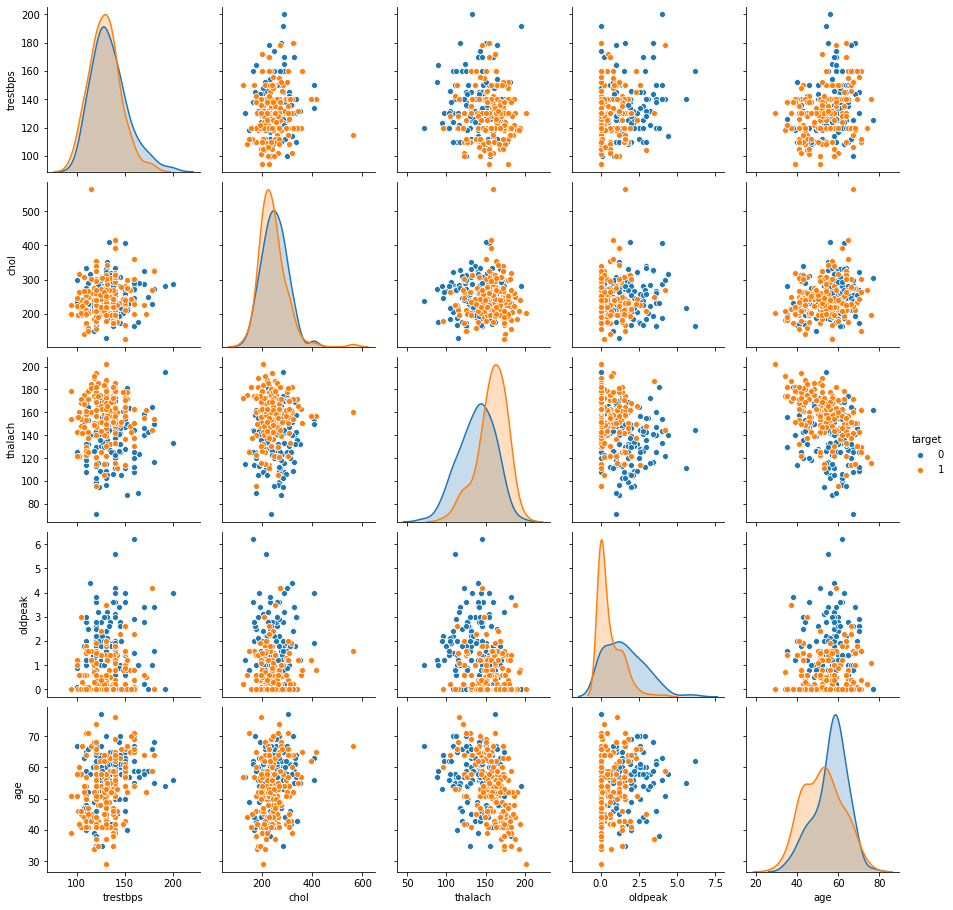

In [179]:
sns.pairplot(df[numeric_variable + ['target']], hue='target')

# Data preparation

handle wrong data

# Data engineering

need expertise

# Data transformation


### numeric

* Normalize [0, 1]
* Standardize ($\mu = 0,  \sigma = 1$)
* Log-transform
* ...

### categorical

* Dummies encoding
* Label encoding
* ...

In [184]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Numeric

In [193]:
numeric_variable

['trestbps', 'chol', 'thalach', 'oldpeak', 'age']

#### original

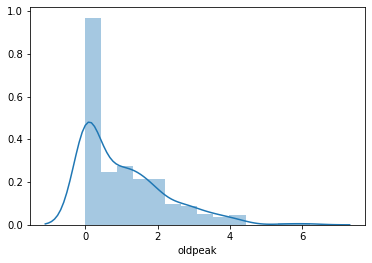

In [183]:
sns.distplot(df['oldpeak'])

#### Normalize

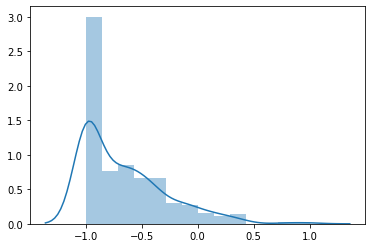

In [197]:
sns.distplot(MinMaxScaler((-1, 1)).fit_transform(df[['oldpeak']]))

#### Standardize

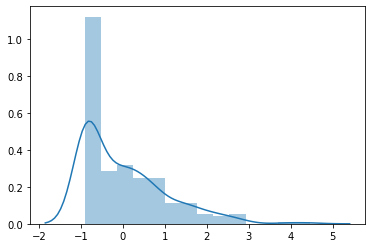

In [192]:
sns.distplot(StandardScaler().fit_transform(df[['oldpeak']]))

#### Log-transform

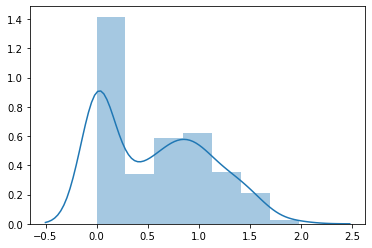

In [195]:
sns.distplot(np.log1p(df[['oldpeak']]))

### Categorical

In [204]:
tmp = pd.DataFrame(
    ["normal", "fixed",'normal', 'normal', 'fixed'],
    columns=['thal']
)
tmp


,thal
0,normal
1,fixed
2,normal
3,normal
4,fixed


In [205]:
pd.get_dummies(tmp)

,thal_fixed,thal_normal
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


# Pipeline

**numeric**

X -> Logarithm-transform -> Normalize -> X_new

**categorical**

X -> One-hot-encoding -> X_new

# Hyperparmeter tuning